# IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sales = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# checking the number of data points
sales.shape

(200, 5)

In [6]:
sales.drop(['Unnamed: 0'], axis = 1,inplace = True)
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
# getting some information about the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There is no categorical columns

In [8]:
# checking for missing values
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null value present.

In [9]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# DATA VISUALIZATION

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

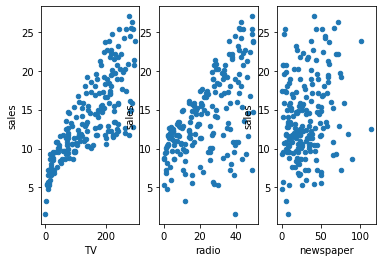

In [10]:
fig,axs = plt.subplots(1,3)
sales.plot(kind = 'scatter',x = 'TV', y = 'sales', ax = axs[0])
sales.plot(kind = 'scatter',x = 'radio', y = 'sales', ax = axs[1])
sales.plot(kind = 'scatter',x = 'newspaper', y = 'sales', ax = axs[2])

In Tv and radio we can see relationship with increase in sales

# PREPROCESSING OF DATA

In [11]:
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
corr = sales.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


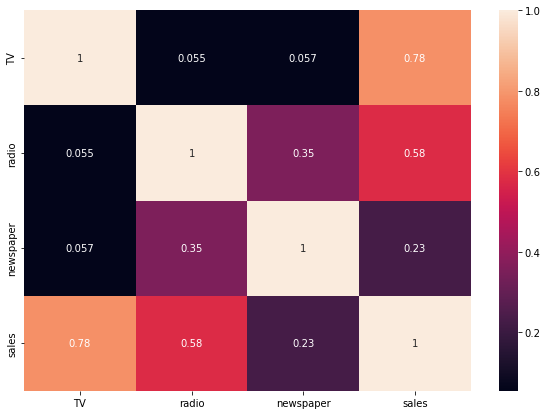

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot = True)
plt.show()

In [14]:
sales.skew().sort_values()

TV          -0.069853
radio        0.094175
sales        0.407571
newspaper    0.894720
dtype: float64

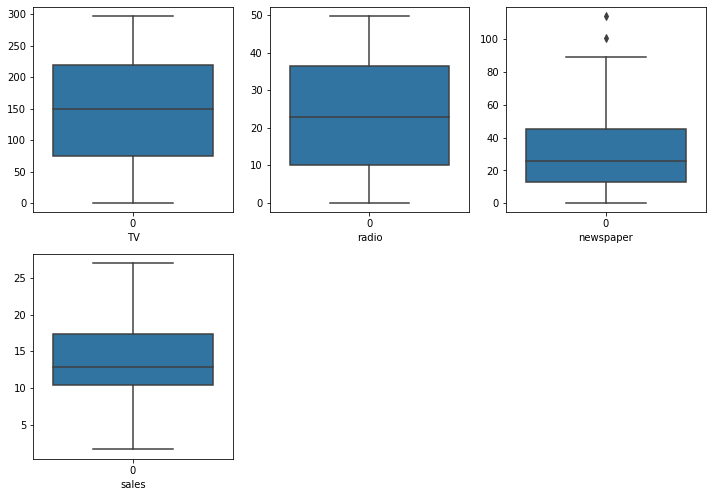

In [15]:
plt.figure(figsize = (10,10), facecolor = 'white')
i = 1
for columns in sales:
    if i<=9:
        ax = plt.subplot(3,3,i)
        sns.boxplot(data = sales[columns])
        plt.xlabel(columns,fontsize = 10)
    
    i+=1
    plt.tight_layout()

 There are no considerable outliers present in the data.

# Model Building

Building a Linear Model

In [16]:
X = sales['TV']
y = sales['sales']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
import statsmodels.api as sm

For TV and Sales

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV', data = sales).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        15:18:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# This model with TV as predictor explains approximately 61% variability of target (Sales).
# The coefficient for TV is 0.047

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ radio', data = sales).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           4.35e-19
Time:                        15:18:25   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# This model with radio as predictor explains approximately 33% variability of target (Sales).
# The coefficient for TV is 0.020

In [23]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ newspaper', data = sales).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 24 Jul 2022   Prob (F-statistic):            0.00115
Time:                        15:18:26   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# This model with newspaper as predictor explains approximately 5% variability of target (Sales).
# The coefficient for TV is 0.05

In [25]:
# The fit is significant. Let's visualize how well the model fit the data.

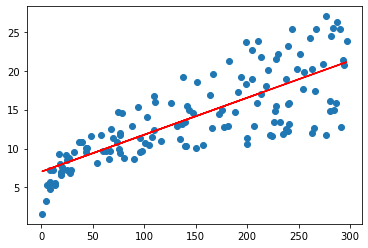

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.0326 + 0.0475*X_train,'r')
plt.show()

Fitting Multiple Linear Regression

In [27]:
# Fitting smf model with predictors TV and Radio 
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV + radio', data = sales).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        15:18:31   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# The coefficient for TV and raadio is 0.45 and 0.18
#This model with TV and Radio as predictors explains approximately 89% variability of target (Sales) that is a better indication with respect to the model with TV alone as predictor.

In [29]:
# Include the third predictor Newspaper also in your multiple linear regression model 
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = sales).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        15:18:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R-squared remains the same 89.97 to 89.97

In [30]:
# we have sufficient evidence from the data for not to include the Newspaper as predictor in the model.

In [31]:
x = sales.drop(columns = ['sales','newspaper'],axis = 1)
y = sales['sales']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 49)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(x_train , y_train)

LinearRegression()

In [35]:
y_pred = lm.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
mean_squared_error(y_test,y_pred)

4.631357717470895

In [38]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.805981291963793

In [43]:
from sklearn.linear_model import Ridge, Lasso,RidgeCV, LassoCV

In [44]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [46]:
alpha = lasscv.alpha_
alpha

0.0003456813701707303

In [47]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0003456813701707303)

In [48]:
y_pred = lasscv.predict(x_test)

In [49]:
mean_squared_error(y_test,y_pred)

4.624608578551416

In [50]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8062640296172837

In [51]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]),
        normalize=True)

In [52]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [53]:
y_pred = ridgecv.predict(x_test)

In [54]:
mean_squared_error(y_test,y_pred)

4.630757759411026

In [55]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.806006425649151

We  applied multiple linear_model  for checking the r_squred score and the RandomForestRegressor gives us the best r2 score.

In [56]:
# Saving this model in.pkl
import joblib
joblib.dump(r2_score,"Advertisement.pkl")

['Advertisement.pkl']